<hr style="border:4px solid Black">

# **Assignment (Part 2)**

### You're tasked with doing segmentation for an email marketing campaign aiming for a 10% engagement rate. Given the provided customer and transactional data, what would be your initial steps in devising a segment to achieve this goal? Walk us through your approach, including specific factors you would consider and how you would arrive at your conclusion. Provide a sample customer list if ablee.

<hr style="border:4px solid Black">

#### This file came from SQL server as I defined the customer's engagement level and implement the variables needed from the two given tables provided, sales and customers, into a single table. Link can be found here:  [Click Here]()

In [397]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\Yosua\Downloads\Data Analyst - CRM - Analysis Challenge\customers_sales_analysis.csv")
df.head()

,SKU,CustomerID,Price,Tax,Store,TransactionID,Descr,Class,Category,transaction_num,engagement_percentile,engagement_level,First Name,Last Name,Address,City,State,Zip
0,8193471391,1021493,30.0,2.625,D066,43417,SL/GLD WRLD HRTS BMK (3SET),Pagemarks,Gifts,1,0.000000,low,HELEN,SAULS,8 TANNER WOODS,FOUNTAIN VALLEY,CA,06410-1872
1,8193418569,1021858,10.5,0.919,D006,5710,SIL/ENM BRIGHTON ABC S LTR V,Charms,Charms,2,0.373229,average,TAMMY,BAIN,51757 NE 199TH ST,ALBUQUERQUE,NM,91320-4246
2,8193432072,1021858,16.0,1.400,D006,2952,SIL/GP/STN PEACE MINI PST EA,Mini Posts,Jewelry,2,0.373229,average,TAMMY,BAIN,51757 NE 199TH ST,ALBUQUERQUE,NM,91320-4246
3,8193472129,1021858,10.0,0.875,D006,5710,SIL/GB GOLDEN HRT CHRM CLASP,Carriers & Clasps,Charms,2,0.373229,average,TAMMY,BAIN,51757 NE 199TH ST,ALBUQUERQUE,NM,91320-4246
4,8193459368,1022506,41.0,3.813,D009,68077,SIL/STN VENUS NECKLACE,Necklaces,Jewelry,1,0.000000,low,MARTIE,PENNINGTON,1516 W STATE ST,PHOENIX,AZ,75034-1704


<hr style="border:4px solid Black">

## Behavioral Segmentation

In [29]:
df.groupby('engagement_level').agg(unique_customers=('CustomerID', 'nunique')
                                  ).reset_index()

,engagement_level,unique_customers
0,average,2328
1,high,1830
2,low,2475


<Figure size 1200x800 with 0 Axes>

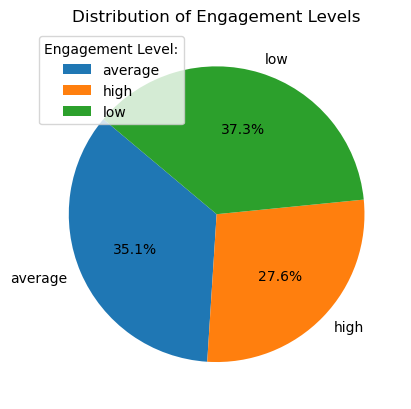

In [326]:
engagement_distribution = df.groupby('engagement_level').agg(unique_customers=('CustomerID', 'nunique')
                                  )
# Plotting the pie chart
plt.figure(figsize=(12, 8))
engagement_distribution.plot(kind='pie', autopct='%1.1f%%', y = 'unique_customers', startangle=140)
plt.title('Distribution of Engagement Levels')
plt.ylabel('')  # Remove the y-label as it's not needed for pie charts
plt.legend(title='Engagement Level:', loc='upper left')

plt.show()

**engagement_level:** low: 1 transaction , average: 2-3 transactions, high: 4+ transactions

**Note:** Remember that the levels were determined by dividing into three equal groups based on the percentile ranks of the transactional occurrence per customer.

In [392]:
# List of customer IDs with low engagement (fewer transactions)
low_engagement_custs = list(df[df['engagement_level'] == 'low']['CustomerID'].unique())

<hr style="border:4px solid Black">

## Geographic Segmentation

In [ ]:
# Segment the average transaction numbers per customer IDs by state.

In [393]:
state_dist = df.groupby('State').agg(average_customer_transactions=('transaction_num', 'mean'),
                        unique_customers=('CustomerID', 'nunique')
                                  ).sort_values(by='average_customer_transactions', ascending=False).reset_index()
state_dist.head()

,State,average_customer_transactions,unique_customers
0,HI,54.530075,4
1,DE,44.456790,2
2,GA,33.451202,80
3,AR,11.878788,75
4,GU,9.000000,1


Text(0, 0.5, 'unique_customers')

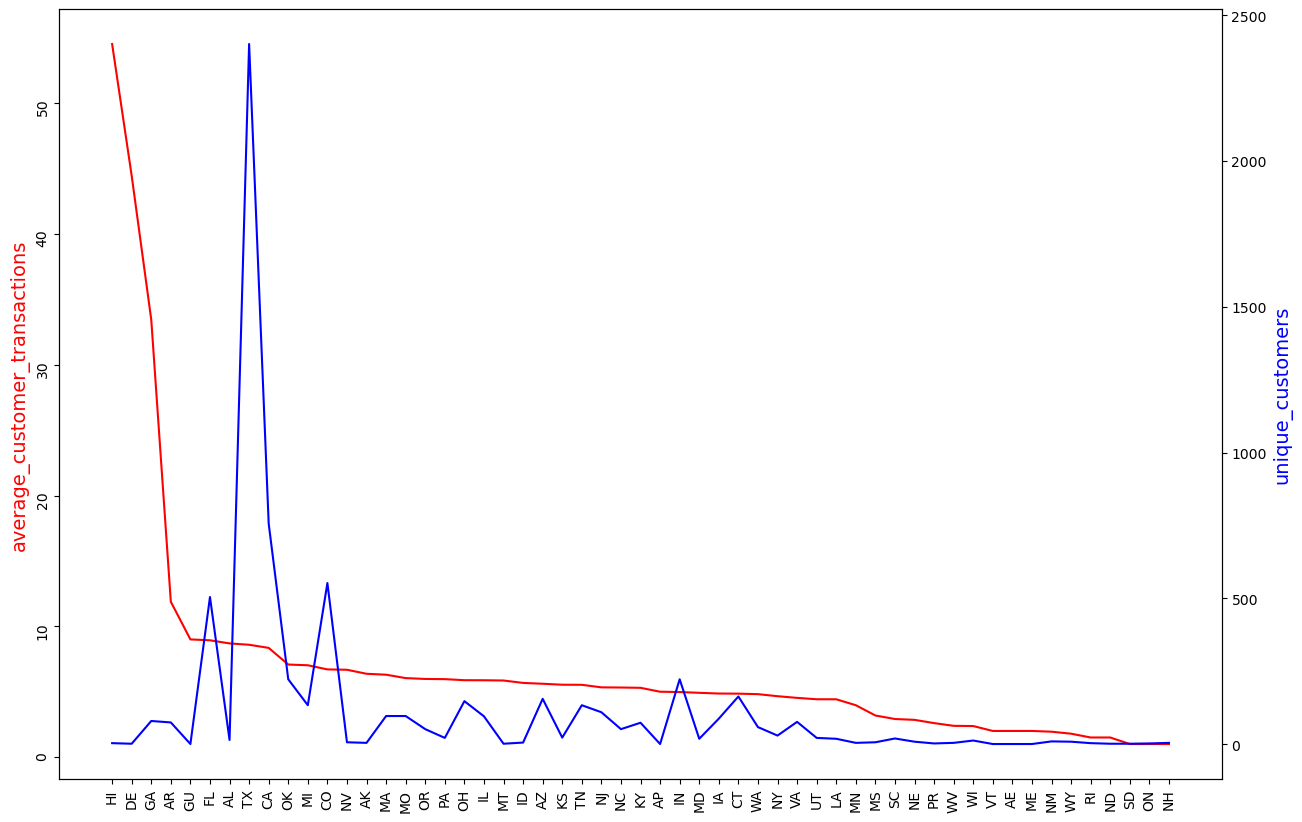

In [138]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.plot(state_dist['State'], state_dist['average_customer_transactions'], color='red')

ax2 = ax.twinx()
ax2.plot(state_dist['State'], state_dist['unique_customers'], color='blue')

ax.tick_params(labelrotation=90)

ax.set_ylabel('average_customer_transactions',fontsize=14, color='red')
ax2.set_ylabel('unique_customers',fontsize=14, color='blue')

**Insights:**
The chart indicates that states in the far right of the graph contains a small group of customers that have little transactions.
Those states and its abbreviations are : SD (South Dakota), ON (Ontario), NH (New Hampshire). States such as HI (Hawaii) and DE (Deleware) have engaged customers but the quantity of these customers are small. The best states for an email marketing campaign are TX (Texas) and CA (California), followed by FL (Florida) and CO (Colorado), as it seems to have a large number of customers that are quality customers.

In [119]:
state_dist[state_dist['State'].isin(['SD', 'ON', 'NH'])]

,State,average_customer_transactions,unique_customers
52,SD,1.0,2
53,ON,1.0,3
54,NH,1.0,5


In [127]:
# List of customers that have made little transactions living in a non engaged state
cust_le = list(df[df['State'].isin(['SD', 'ON', 'NH'])]['CustomerID'].unique())
cust_le
#df[df['CustomerID'].isin(cust_le)]

[6047563,
 18020250,
 25029751,
 53010097,
 58010819,
 59014356,
 60010228,
 102000491,
 9937008804,
 9942042689]

In [391]:
# List of customers that have made many transactions living in engaged states (Quality customers living in engaged states).
cust_me = list(df[df['State'].isin(['TX', 'CA', 'FL', 'CO'])]['CustomerID'].unique()) # 4216 number of Customer IDs

<hr style="border:4px solid Black">

#### Do customers with more transactions have a correlation with how much they spend (total sales including tax)?

In [214]:
df['total_price_tax_included'] = df['Price'] + df['Tax']
transaction_vs_total_sales = df.groupby(['CustomerID', 'transaction_num'])['total_price_tax_included'].sum().reset_index().sort_values(
    by=['transaction_num'], ascending=False)
transaction_vs_total_sales
#transaction_vs_total_sales['transaction_num'].corr(transaction_vs_total_sales['total_price_tax_included'])

,CustomerID,transaction_num,total_price_tax_included
6185,9937022270,110,5956.317
434,13020410,88,6693.388
301,8008745,68,7545.155
210,6042892,56,8940.305
3011,83000877,55,12014.950
...,...,...,...
3193,104005345,1,125.580
3196,104006044,1,38.970
3197,104006053,1,89.350
3201,104006294,1,39.280


In [383]:
transaction_vs_total_sales['transaction_num'].corr(transaction_vs_total_sales['total_price_tax_included'])

0.7723908287208892

**Positive correlation** indicating that as customers have more transactions, the total sales price increases and vice versa. This may indicate that for the most part, customers with fewer transaction does not neccesarily mean quality customers as repeating customers are more valuable.

<hr style="border:4px solid Black">

## Customer Segmentation w/ K-Means Clustering

**Note:** This is merely a very simple analysis to get a glance of the types of spenders in the given data.

In [374]:
x = transaction_vs_total_sales[['transaction_num', 'total_price_tax_included']]
x

,transaction_num,total_price_tax_included
6185,110,5956.317
434,88,6693.388
301,68,7545.155
210,56,8940.305
3011,55,12014.950
...,...,...
3193,1,125.580
3196,1,38.970
3197,1,89.350
3201,1,39.280


C:\Users\Yosua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Yosua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


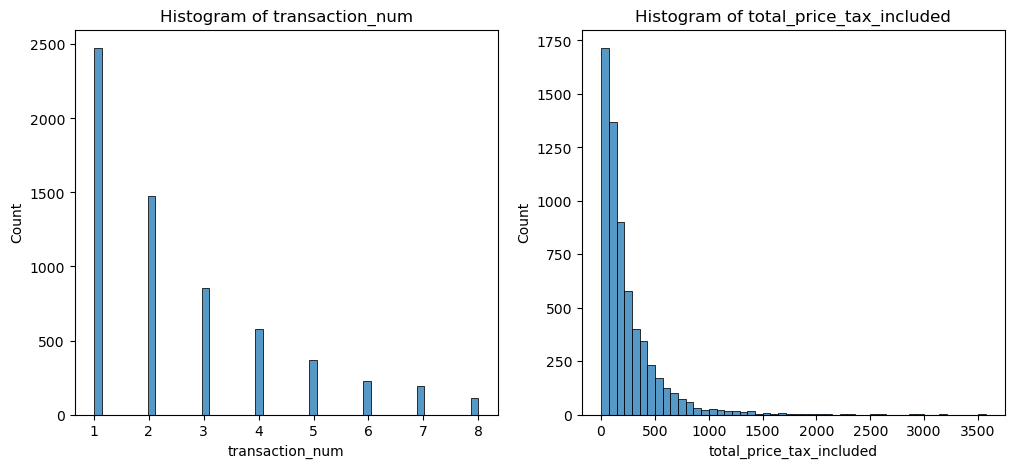

In [373]:
# Histograms to interpret the outlies
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.histplot(x['transaction_num'], bins = 50, ax=ax1)
ax1.set_title('Histogram of transaction_num')
sns.histplot(x['total_price_tax_included'], bins = 50, ax=ax2)
ax2.set_title('Histogram of total_price_tax_included')

plt.show()

In [375]:
# Removing the outliers using Inter Quartile Range (IQR)

from scipy.stats import iqr

Q1 = np.quantile(x['total_price_tax_included'],0.25)
Q3 = np.quantile(x['total_price_tax_included'],0.75)
IQR = Q3 - Q1

#Remove outliers from the dataframe
x = x[~((x['total_price_tax_included'] < (Q1 - 1.5 * IQR)) |(x['total_price_tax_included'] > (Q3 + 1.5 * IQR)))]

In [244]:
from sklearn.cluster import KMeans

In [376]:
k_means = KMeans()
k_means.fit(x)

C:\Users\Yosua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [377]:
k_means = KMeans()
k_means.fit_predict(x)

C:\Users\Yosua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 7, 0, ..., 4, 2, 2])

**Elbow Method** w/ WCSS (Within-Cluster Sum of Squares)

In [378]:
# Find optimal number of clusters:

optimal_clu = []
for i in range(1, 11):
    k_means = KMeans(n_clusters= i)
    k_means.fit(x)
    optimal_clu.append(k_means.inertia_) 

C:\Users\Yosua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Yosua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Yosua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Yosua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Yosua\anaconda3\Lib\site-packages\sklearn\clust

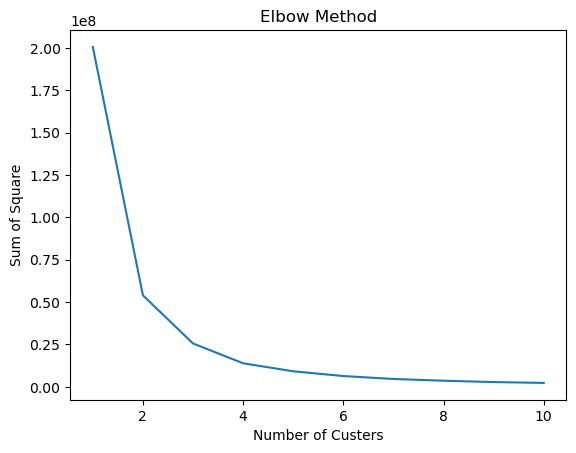

In [379]:
plt.plot(range(1,11), optimal_clu)
plt.title('Elbow Method')
plt.xlabel('Number of Custers')
plt.ylabel('Sum of Square')
plt.show()

Optimal number of clusters look to be 3.

In [387]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means_pred = k_means.fit_predict(x)

C:\Users\Yosua\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


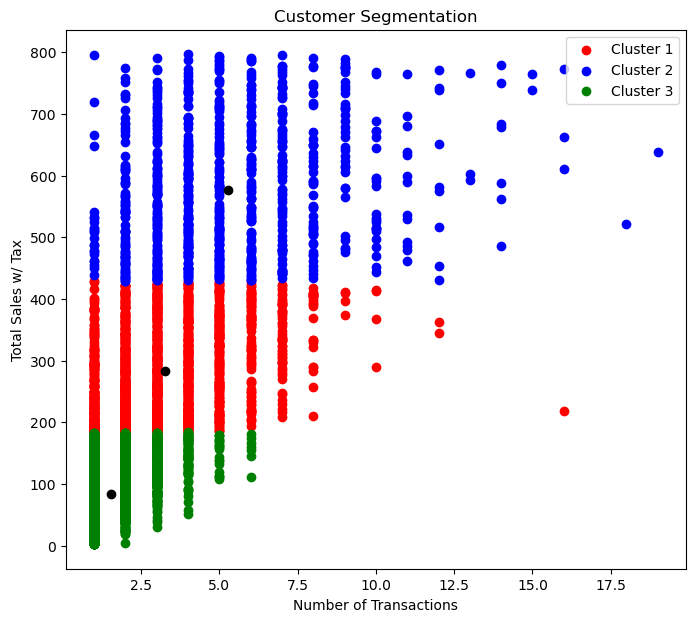

In [388]:
plt.figure(figsize=(8, 7))

plt.scatter(x.iloc[k_means_pred==0,0], x.iloc[k_means_pred==0,1], c='red', label='Cluster 1')
plt.scatter(x.iloc[k_means_pred==1,0], x.iloc[k_means_pred==1,1], c='blue', label='Cluster 2')
plt.scatter(x.iloc[k_means_pred==2,0], x.iloc[k_means_pred==2,1], c='green', label='Cluster 3')
#plt.scatter(x.iloc[k_means_pred==3,0], x.iloc[k_means_pred==3,1], c='yellow', label='Cluster 4')

plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1], c='black')
plt.title('Customer Segmentation')
plt.xlabel('Number of Transactions')
plt.ylabel('Total Sales w/ Tax')
plt.legend()
plt.show()

As we can see there are still some outliers in this segmentation graph, but we will leave it as is since we can still see the bigger picture. The observations are tightly grouped along vertically.

**Insights:** The first segment(Cluster 1) is the group of customers that are moderate spenders, meaning these are the ones who purchase an okay amount and purchase somewhat frequently. The second segment(Cluster 2) is the group of customers that are heavy spenders, meaning these are the ones who's carts are either 'loaded' or they frequently purchase from us. These are our quality customers. The third segment(Cluster 3) is the group of customers who are low spenders. These customers either made very little transactional purchases or did not purchase expensive products.

<hr style="border:4px solid Black">

## Key Takeaways for effective email marketing campaigns

We can target the segment groups that are low spenders, or perhaps look to increase business in locations where quality customers are lacking. Targeting these groups could possibly expand to new customers or keep retaining our customers in the longer run.

#### Additional segments that could achieve the same goals:

Segment the 'Class' by the number of transactions made for each customer. This could indicate which are the favorite types of products.  
Segment the 'Categories' to get insights for which emails we need to tailor to and send out based on if the sales or transactional occurence is lacking or striving.